In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay



In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")



In [4]:
print(df_train.info())
print(df_train.describe())
print(df_train.isnull().sum())

# Check target balance
print(df_train['fake'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean

PERFROMING DATA VISUALIZATION

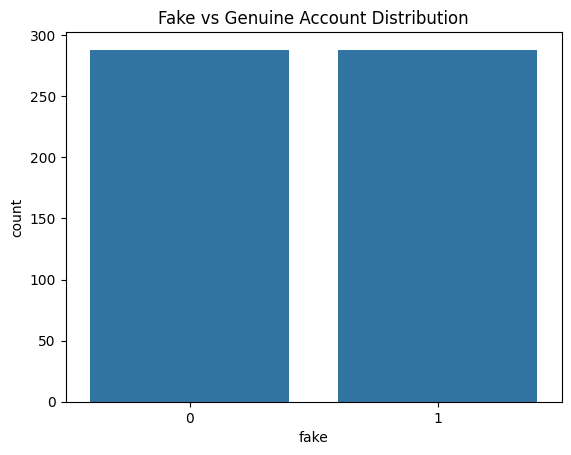

In [7]:
#Vislualizing the number of fake and real accounts (using seaborn library)
sns.countplot(x='fake', data=df_train)
plt.title("Fake vs Genuine Account Distribution")
plt.show()


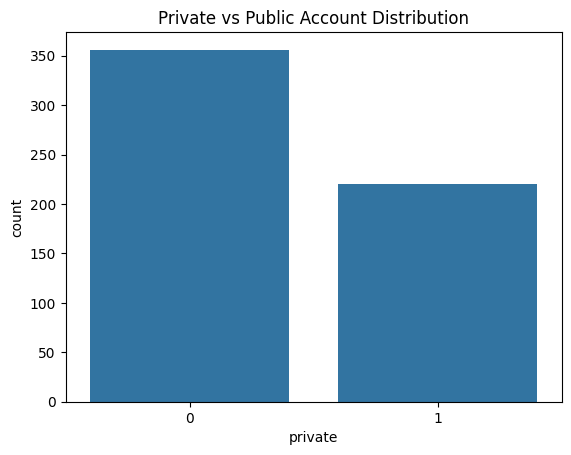

In [8]:
#Distribution of Private vs Public Accounts
sns.countplot(x='private', data=df_train)
plt.title("Private vs Public Account Distribution")
plt.show()


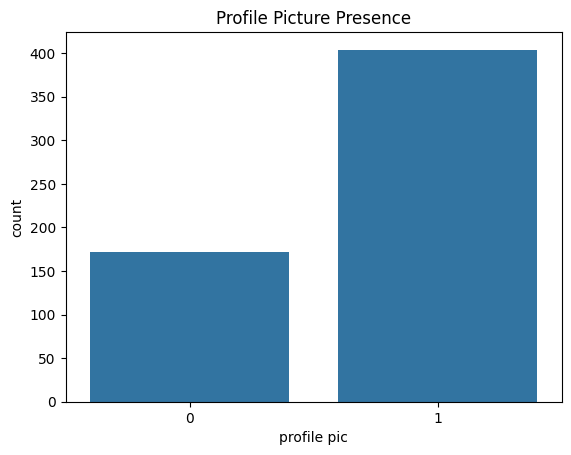

In [9]:
#Profile Picture Presence 
sns.countplot(x='profile pic', data=df_train)
plt.title("Profile Picture Presence")
plt.show()


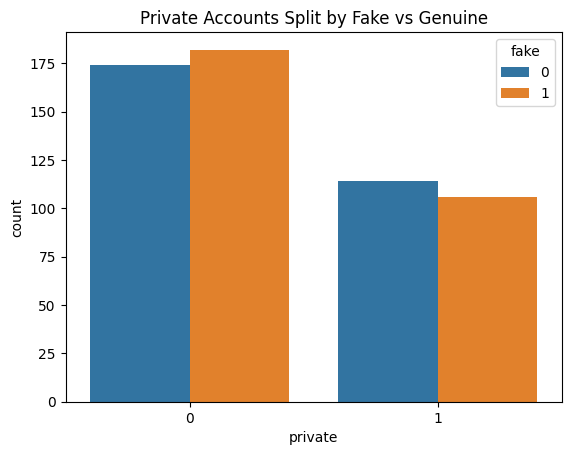

In [10]:
#Combined: Fake vs Private
sns.countplot(x='private', hue='fake', data=df_train)
plt.title("Private Accounts Split by Fake vs Genuine")
plt.show()


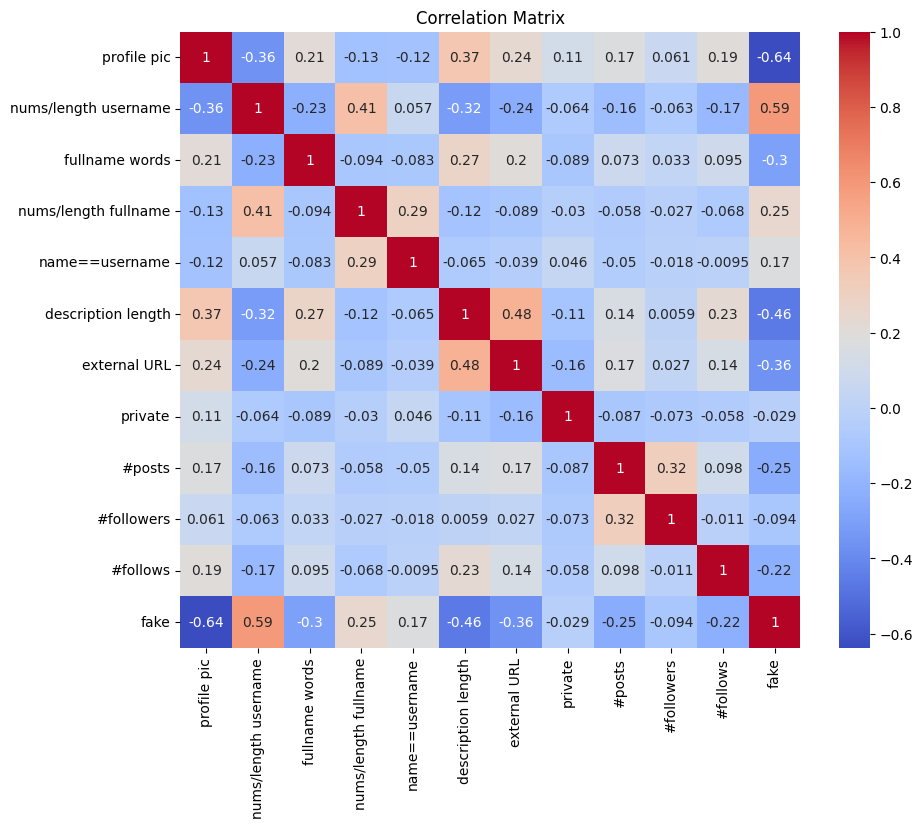

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


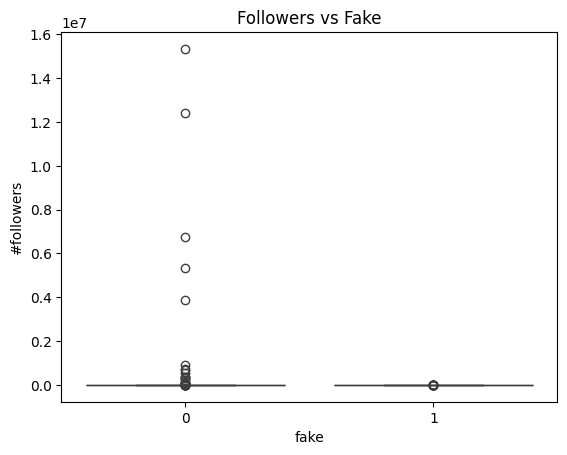

In [11]:
# Followers vs Fake
sns.boxplot(x='fake', y='#followers', data=df_train)
plt.title("Followers vs Fake")
plt.show()



In [ ]:
X = df_train.drop(['fake'], axis=1)
y = df_train['fake']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # ✅ Don't forget this

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Accuracy: 0.8706896551724138
Confusion Matrix:
 [[57  6]
 [ 9 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



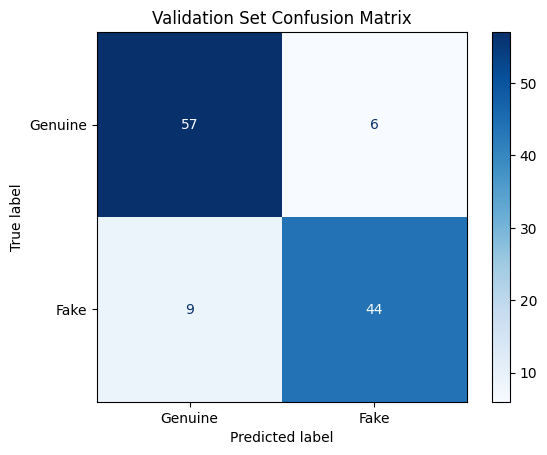

In [ ]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Validation Set Confusion Matrix")
plt.show()


Test Accuracy: 0.9333333333333333
Test Confusion Matrix:
 [[56  4]
 [ 4 56]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



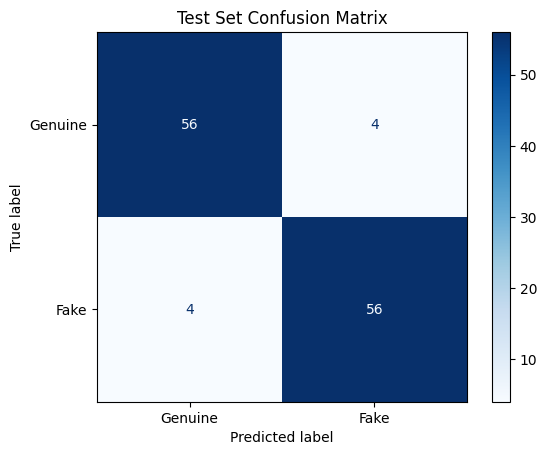

In [ ]:
X_test = df_test.drop(['fake'], axis=1)
y_test = df_test['fake']

test_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Test Classification Report:\n", classification_report(y_test, test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Test Set Confusion Matrix")
plt.show()


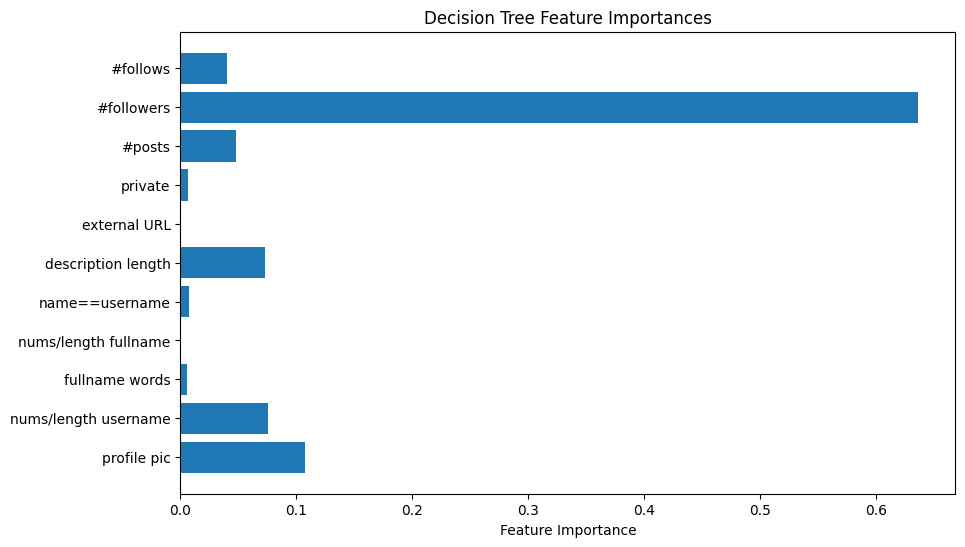

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()
